In [3]:
# Install chardet if not already installed
!pip install chardet

# Detect encoding
import chardet
with open("/content/customers.csv", 'rb') as f:
    result = chardet.detect(f.read())
print(f"Detected Encoding: {result['encoding']}")

# Load the dataset with the detected encoding
data = pd.read_csv("/content/customers.csv", encoding=result['encoding'])

Detected Encoding: Windows-1252


   customer_id          name  age gender       city  join_date  recency  \
0       570586   Falak Kanda   37      M   Guwahati  4/13/2023        1   
1       294484  Meera Parekh   36      M    Kolkata  6/25/2023        7   
2       669686    Manya Chad   44      M    Kolkata   5/9/2022       37   
3       607103   Fitan Desai   18      F  Ahmedabad  12/1/2024        8   
4       633928  Hemal Pandey   37      M  Ahmedabad  3/26/2023        8   

   frequency  monetary  
0          9   2777.92  
1         10   9333.17  
2          6   3243.52  
3         12  10222.43  
4          6   4519.36  

Missing Values:
 customer_id    0
name           0
age            0
gender         0
city           0
join_date      0
recency        0
frequency      0
monetary       0
dtype: int64

Summary Statistics:
          customer_id          age      recency    frequency      monetary
count    5000.000000  5000.000000  5000.000000  5000.000000   5000.000000
mean   500658.747400    34.815600    35.89160

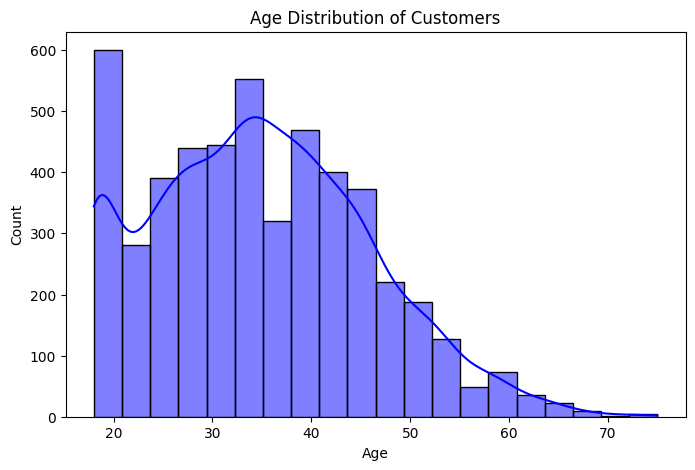

<ipython-input-2-88682a3be2b7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


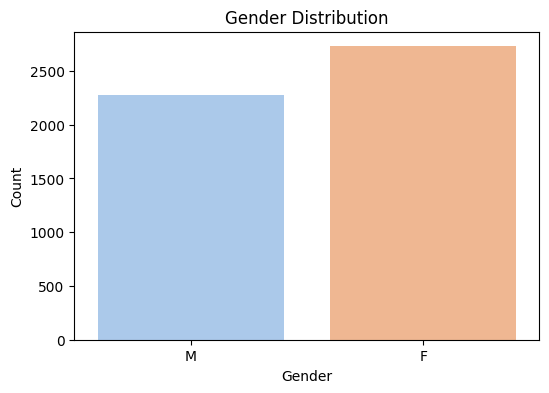

<ipython-input-2-88682a3be2b7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='monetary', data=df, palette='coolwarm')


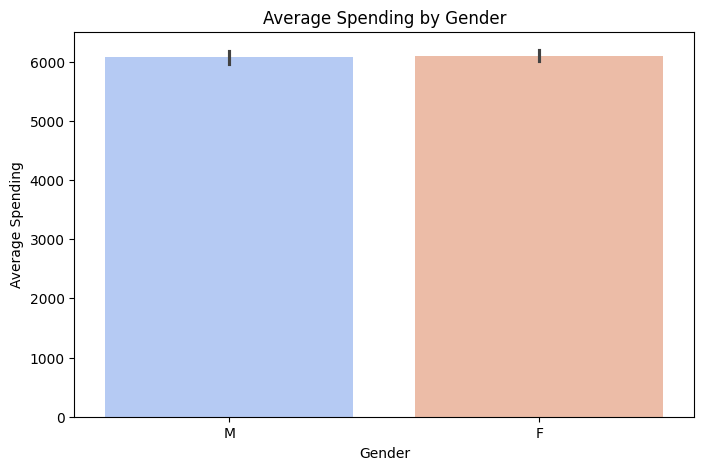

<ipython-input-2-88682a3be2b7>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


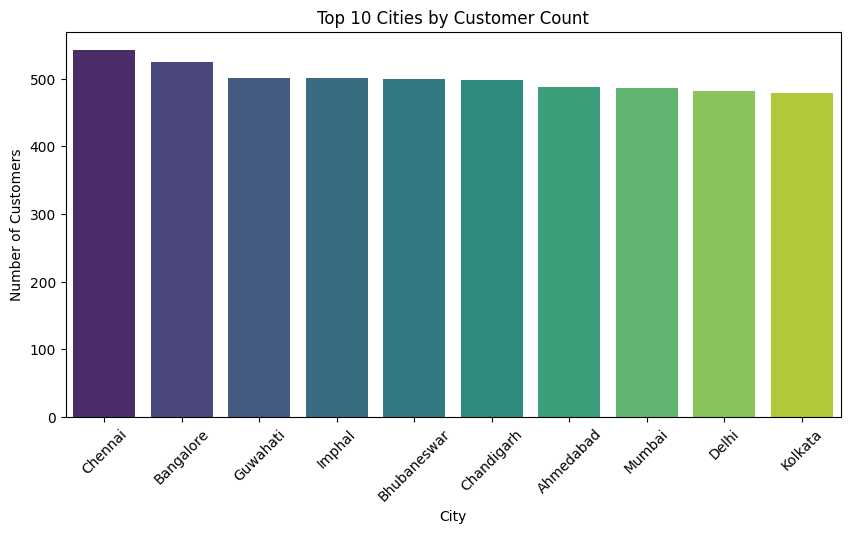

<ipython-input-2-88682a3be2b7>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='monetary', data=df, palette='cool')


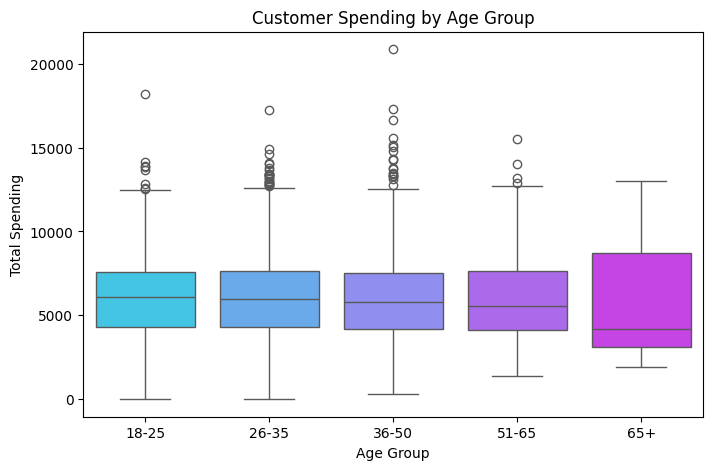

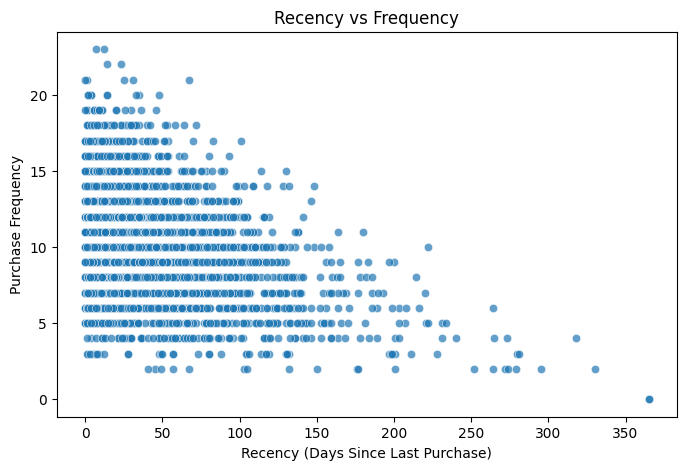

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer dataset
df = pd.read_csv("/content/customers.csv", encoding="latin1")


# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Spending by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='monetary', data=df, palette='coolwarm')
plt.title("Average Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending")
plt.show()

# Top Cities by Customer Count
top_cities = df['city'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()

# Spending by Age Group
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 50, 65, 80], labels=['18-25', '26-35', '36-50', '51-65', '65+'])
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='monetary', data=df, palette='cool')
plt.title("Customer Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spending")
plt.show()

# Recency vs. Frequency Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['recency'], y=df['frequency'], alpha=0.7)
plt.title("Recency vs Frequency")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Purchase Frequency")
plt.show()

In [4]:
import pandas as pd

# Load data with the correct encoding
try:
    df = pd.read_csv("/content/customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("/content/customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/customers.csv", encoding='ISO-8859-1')

# Task 1: RFM Analysis for Customer Value
def task1_label_customers(df):
    # Calculate RFM scores
    rfm = df[['customer_id', 'recency', 'frequency', 'monetary']].copy()

    # Normalize RFM values (higher = better)
    rfm['R_Score'] = (rfm['recency'].rank(ascending=False, pct=True)) * 100
    rfm['F_Score'] = (rfm['frequency'].rank(ascending=True, pct=True)) * 100
    rfm['M_Score'] = (rfm['monetary'].rank(ascending=True, pct=True)) * 100

    # Calculate composite RFM score
    rfm['RFM_Score'] = (rfm['R_Score'] * 0.2) + (rfm['F_Score'] * 0.3) + (rfm['M_Score'] * 0.5)

    # Label customers based on RFM score percentiles
    rfm['Customer_Label'] = pd.qcut(
        rfm['RFM_Score'],
        q=[0, 0.3, 0.7, 1],  # 30% Low, 40% Mid, 30% High
        labels=['Low', 'Mid', 'High']
    )

    # Merge labels back into the original dataframe
    df = df.merge(rfm[['customer_id', 'Customer_Label']], on='customer_id', how='left')
    return df

# Run Task 1
df_labeled = task1_label_customers(df)

# Save the labeled data to a new CSV file (optional)
df_labeled.to_csv("customers_labeled.csv", index=False)

# Display the first few rows with labels
print("Customers with Labels:\n", df_labeled.head())

Customers with Labels:
    customer_id          name  age gender       city  join_date  recency  \
0       570586   Falak Kanda   37      M   Guwahati  4/13/2023        1   
1       294484  Meera Parekh   36      M    Kolkata  6/25/2023        7   
2       669686    Manya Chad   44      M    Kolkata   5/9/2022       37   
3       607103   Fitan Desai   18      F  Ahmedabad  12/1/2024        8   
4       633928  Hemal Pandey   37      M  Ahmedabad  3/26/2023        8   

   frequency  monetary Customer_Label  
0          9   2777.92            Low  
1         10   9333.17           High  
2          6   3243.52            Low  
3         12  10222.43           High  
4          6   4519.36            Low  


In [5]:
import pandas as pd

# Load data with the correct encoding
try:
    df = pd.read_csv("/content/customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("/content/customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/customers.csv", encoding='ISO-8859-1')

# Task 1: RFM Analysis for Customer Value
def task1_most_valuable_customers(df):
    # Calculate RFM scores
    rfm = df[['customer_id', 'recency', 'frequency', 'monetary']].copy()

    # Normalize RFM values (higher = better)
    rfm['R_Score'] = (rfm['recency'].rank(ascending=False, pct=True)) * 100
    rfm['F_Score'] = (rfm['frequency'].rank(ascending=True, pct=True)) * 100
    rfm['M_Score'] = (rfm['monetary'].rank(ascending=True, pct=True)) * 100

    # Calculate composite RFM score
    rfm['RFM_Score'] = (rfm['R_Score'] * 0.2) + (rfm['F_Score'] * 0.3) + (rfm['M_Score'] * 0.5)

    # Rank customers
    top_customers = rfm.sort_values('RFM_Score', ascending=False).head(10)
    return top_customers

# Run Task 1
result_task1 = task1_most_valuable_customers(df)
print("Top 10 Most Valuable Customers:\n", result_task1)

Top 10 Most Valuable Customers:
       customer_id  recency  frequency  monetary  R_Score  F_Score  M_Score  \
1137       222253        0         17  12546.03    98.57    97.90    98.62   
354        960632        2         19  13299.77    92.94    99.47    99.20   
2767       520583        2         18  13502.23    92.94    98.91    99.38   
2222       732887        0         16  12295.34    98.57    96.26    98.32   
2897       768171        0         19  10955.00    98.57    99.47    96.32   
1915       549276        2         17  13409.38    92.94    97.90    99.28   
4842       619180        2         17  13015.98    92.94    97.90    99.02   
2182       461437        2         20  11829.16    92.94    99.74    97.86   
312        237090        1         17  11801.83    95.67    97.90    97.76   
2853       922532        1         18  11162.58    95.67    98.91    96.76   

      RFM_Score  
1137     98.394  
354      98.029  
2767     97.951  
2222     97.752  
2897     97.715  


In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data
try:
    df = pd.read_csv("/content/customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("/content/customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/customers.csv", encoding='ISO-8859-1')

# Task 2: Shopping Pattern Analysis
def task2_shopping_patterns(df):
    # Pattern 1: City-wise spending
    city_stats = df.groupby('city').agg({
        'monetary': 'mean',  # Average spending per city
        'frequency': 'mean',  # Average frequency per city
        'customer_id': 'count'  # Total customers per city
    }).rename(columns={'customer_id': 'total_customers'})

    # Pattern 2: Gender differences
    gender_stats = df.groupby('gender').agg({
        'monetary': 'mean',  # Average spending per gender
        'frequency': 'mean'  # Average frequency per gender
    })

    # Pattern 3: Cluster analysis (using K-means)
    # Prepare data for clustering
    X = df[['frequency', 'monetary']]  # Features for clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Create 3 clusters
    df['cluster'] = kmeans.fit_predict(X)  # Assign cluster labels to customers

    return city_stats, gender_stats, df[['customer_id', 'cluster']]

# Run Task 2
city_stats, gender_stats, clusters = task2_shopping_patterns(df)

# Display results
print("City-wise Stats:\n", city_stats)
print("\nGender Stats:\n", gender_stats)
print("\nCustomer Clusters:\n", clusters.head())

City-wise Stats:
                 monetary  frequency  total_customers
city                                                
Ahmedabad    6017.822602   9.829918              488
Bangalore    6027.519809   9.839695              524
Bhubaneswar  5861.347560   9.762000              500
Chandigarh   5984.205241   9.985944              498
Chennai      6053.566716  10.092251              542
Delhi        6638.326611  10.079002              481
Guwahati     6037.005210  10.331337              501
Imphal       6116.384950  10.027944              501
Kolkata      6012.496848   9.895616              479
Mumbai       6147.655679  10.154321              486

Gender Stats:
            monetary  frequency
gender                        
F       6101.524996  10.018695
M       6070.259239   9.977553

Customer Clusters:
    customer_id  cluster
0       570586        1
1       294484        2
2       669686        1
3       607103        2
4       633928        1


<ipython-input-13-8be015f2937f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette=['lightcoral', 'lightblue', 'lightgreen'])


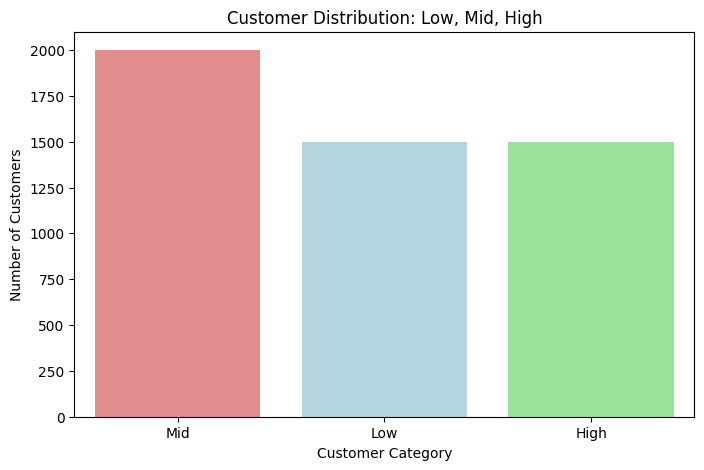

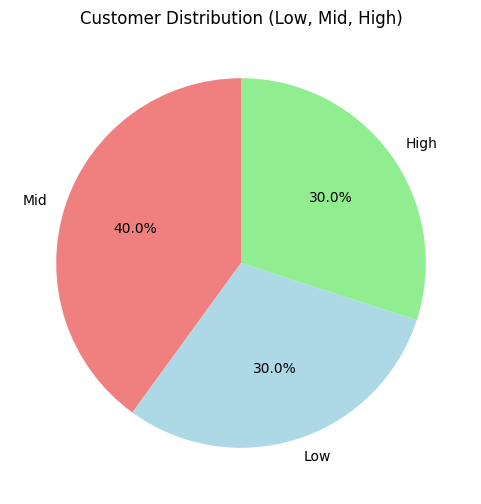

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/customers_labeled.csv", encoding='utf-8')  # Adjust path if needed

# Count the number of customers in each category
customer_counts = df['Customer_Label'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette=['lightcoral', 'lightblue', 'lightgreen'])
plt.xlabel("Customer Category")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution: Low, Mid, High")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Customer Distribution (Low, Mid, High)")
plt.show()


In [15]:
# Task 3: Age Group Analysis
def task3_age_group_analysis(df):
    # Create age groups
    bins = [18, 25, 35, 45, 55, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Analyze spending by age group
    age_stats = df.groupby('age_group').agg({
        'monetary': ['mean', 'sum'],
        'frequency': 'mean',
        'customer_id': 'count'
    }).rename(columns={'customer_id': 'total_customers'})

    return age_stats

# Run Task 3
age_stats = task3_age_group_analysis(df)
print("\nSpending by Age Group:\n", age_stats)


Spending by Age Group:
               monetary              frequency total_customers
                  mean         sum       mean           count
age_group                                                    
18-24      6187.484751  6224609.66  10.086481            1006
25-34      6165.688856  9433503.95  10.142484            1530
35-44      5972.545883  8994654.10   9.889110            1506
45-54      6023.696721  4427417.09   9.873469             735
55+        6082.530852  1356404.38   9.798206             223


<ipython-input-15-745d034a012a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group').agg({


<ipython-input-16-4f682772eccd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['monetary'].mean().plot(kind='bar', color='skyblue')


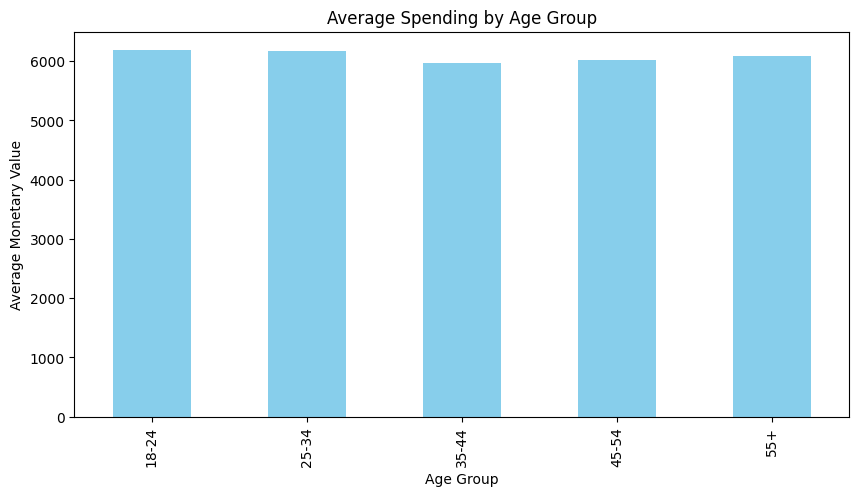

In [16]:
import matplotlib.pyplot as plt

# Visualize Age Group Spending
plt.figure(figsize=(10, 5))
df.groupby('age_group')['monetary'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Monetary Value')
plt.show()

Spending by Age Group:
               monetary              frequency total_customers
                  mean         sum       mean           count
age_group                                                    
18-24      6187.484751  6224609.66  10.086481            1006
25-34      6165.688856  9433503.95  10.142484            1530
35-44      5972.545883  8994654.10   9.889110            1506
45-54      6023.696721  4427417.09   9.873469             735
55+        6082.530852  1356404.38   9.798206             223


<ipython-input-17-8ab53b88a432>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group').agg({


<Figure size 1000x600 with 0 Axes>

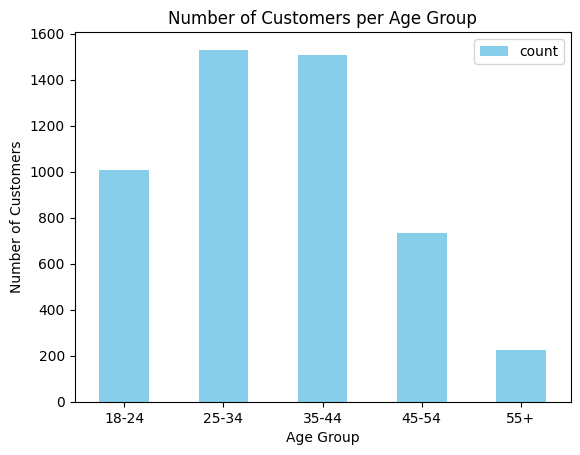

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
try:
    df = pd.read_csv("/content/customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("/content/customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/customers.csv", encoding='ISO-8859-1')

# Task 3: Age Group Analysis
def task3_age_group_analysis(df):
    # Create age groups
    bins = [18, 25, 35, 45, 55, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Analyze spending by age group
    age_stats = df.groupby('age_group').agg({
        'monetary': ['mean', 'sum'],  # Average and total spending
        'frequency': 'mean',          # Average frequency
        'customer_id': 'count'        # Total customers per age group
    }).rename(columns={'customer_id': 'total_customers'})

    return age_stats

# Run Task 3
age_stats = task3_age_group_analysis(df)

# Display age group stats
print("Spending by Age Group:\n", age_stats)

# Visualize customer count per age group
plt.figure(figsize=(10, 6))
age_stats['total_customers'].plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [18]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/customers_labeled.csv")

# Define churn scoring based on quantiles
df['Recency_Score'] = pd.qcut(df['recency'], q=3, labels=[3, 2, 1])  # Higher recency = lower score
df['Frequency_Score'] = pd.qcut(df['frequency'], q=3, labels=[1, 2, 3])  # Lower frequency = lower score
df['Monetary_Score'] = pd.qcut(df['monetary'], q=3, labels=[1, 2, 3])  # Lower spending = lower score

# Calculate Churn Score (lower score = high churn risk)
df['Churn_Score'] = df['Recency_Score'].astype(int) + df['Frequency_Score'].astype(int) + df['Monetary_Score'].astype(int)

# Categorize churn risk
def churn_risk(score):
    if score >= 5:
        return "Active"
    elif 4<= score < 4:
        return "At Risk"
    else:
        return "Churned"

df['Churn_Status'] = df['Churn_Score'].apply(churn_risk)

# Save results
df.to_csv("customer_churn_analysis.csv", index=False)

# Display churn summary
print(df[['customer_id', 'name', 'Churn_Status']].head())

# Churn percentage
churn_rate = df['Churn_Status'].value_counts(normalize=True) * 100
print("\nChurn Rate:\n", churn_rate)


   customer_id          name Churn_Status
0       570586   Falak Kanda       Active
1       294484  Meera Parekh       Active
2       669686    Manya Chad      Churned
3       607103   Fitan Desai       Active
4       633928  Hemal Pandey       Active

Churn Rate:
 Churn_Status
Active     71.76
Churned    28.24
Name: proportion, dtype: float64


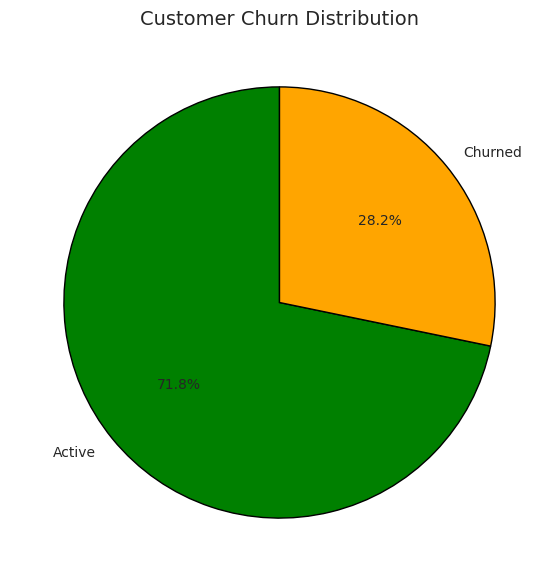

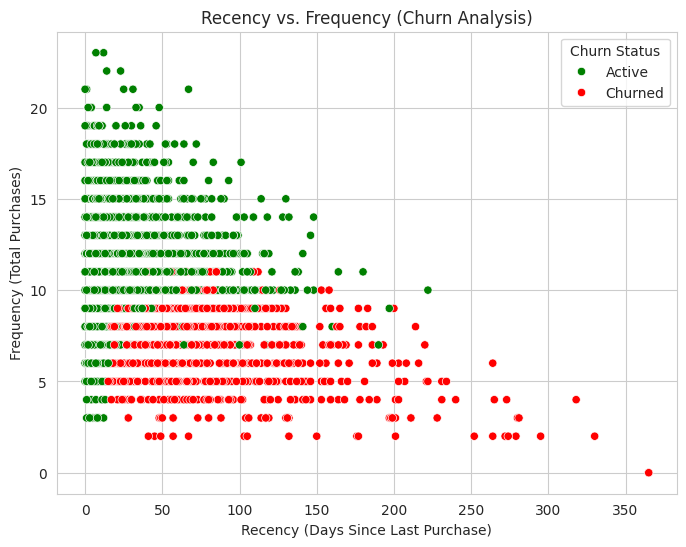

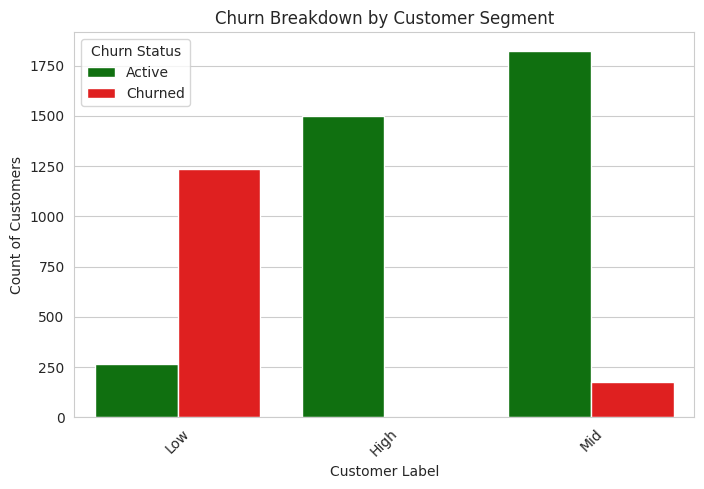

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load analyzed churn dataset
df = pd.read_csv("customer_churn_analysis.csv")

# Set style
sns.set_style("whitegrid")

# Churn Distribution - Pie Chart
plt.figure(figsize=(7, 7))
df["Churn_Status"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green", "orange", "red"],
                                           startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Customer Churn Distribution", fontsize=14)
plt.ylabel("")  # Hide y-label
plt.show()

# Recency vs. Frequency - Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["recency"], y=df["frequency"], hue=df["Churn_Status"], palette={"Active": "green", "At Risk": "orange", "Churned": "red"})
plt.title("Recency vs. Frequency (Churn Analysis)")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Frequency (Total Purchases)")
plt.legend(title="Churn Status")
plt.show()

# Churn Breakdown by Customer Label - Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Customer_Label", hue="Churn_Status", palette={"Active": "green", "At Risk": "orange", "Churned": "red"})
plt.title("Churn Breakdown by Customer Segment")
plt.xlabel("Customer Label")
plt.ylabel("Count of Customers")
plt.xticks(rotation=45)
plt.legend(title="Churn Status")
plt.show()


In [20]:
pip install pandas numpy scikit-learn

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load Dataset
df = pd.read_csv("/content/customers_labeled.csv")  # Change filename accordingly

# Debugging: Ensure necessary columns exist
required_cols = {'customer_id', 'name', 'recency', 'frequency', 'monetary', 'Customer_Label'}
if not required_cols.issubset(df.columns):
    missing = required_cols - set(df.columns)
    print(f"❌ ERROR: Missing columns: {missing}")
    exit()

# Rule-Based NBA Function
def rule_based_nba(row):
    if row['Customer_Label'] == 'High':
        return 'vip_loyalty_bonus'
    elif row['Customer_Label'] == 'Mid':
        return 'general_10%_discount'
    elif row['Customer_Label'] == 'Low':
        return 'reactivation_email_20%_off'
    else:
        return 'no_action'

df['rule_based_action'] = df.apply(rule_based_nba, axis=1)

# Debugging: Check Rule-Based Actions
print("Rule-Based Actions Distribution:\n", df['rule_based_action'].value_counts())

# Prepare Data for ML-Based NBA
features = ['recency', 'frequency', 'monetary']
target = 'rule_based_action'

# Debugging: Check if features have valid data
print("Feature Summary:\n", df[features].describe())

# Encode categorical target variable
encoder = LabelEncoder()
df['rule_based_action_encoded'] = encoder.fit_transform(df['rule_based_action'])

# Train Decision Tree Model
X = df[features]
y = df['rule_based_action_encoded']
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
model.fit(X, y)

# Generate ML-Based Recommendations
df['ml_based_action_encoded'] = model.predict(X)
df['ml_based_action'] = encoder.inverse_transform(df['ml_based_action_encoded'])

# Determine Final Recommendation
def final_recommendation(row):
    if row['rule_based_action'] == row['ml_based_action']:
        return row['rule_based_action']
    else:
        return f"ml_override_{row['ml_based_action']}"

df['final_recommendation'] = df.apply(final_recommendation, axis=1)

# Save Final Recommendations
df[['customer_id', 'name', 'rule_based_action', 'ml_based_action', 'final_recommendation']].to_csv("final_nba_output.csv", index=False)

print("✅ NBA applied successfully. Results saved in 'final_nba_output.csv'")




Rule-Based Actions Distribution:
 rule_based_action
general_10%_discount          2000
reactivation_email_20%_off    1500
vip_loyalty_bonus             1500
Name: count, dtype: int64
Feature Summary:
            recency    frequency      monetary
count  5000.000000  5000.000000   5000.000000
mean     35.891600    10.000000   6087.317836
std      38.580974     3.161645   2487.262165
min       0.000000     0.000000      0.000000
25%      10.000000     8.000000   4256.645000
50%      24.000000    10.000000   5902.380000
75%      49.000000    12.000000   7605.112500
max     365.000000    23.000000  20866.040000
✅ NBA applied successfully. Results saved in 'final_nba_output.csv'
